In [0]:
pip install pymdptoolbox

In [0]:
import mdptoolbox, mdptoolbox.example
import matplotlib.pyplot as plt

# Forest Management

In [191]:
P, R = mdptoolbox.example.forest(S=5)
print('Transition matrix: P')
print(P)
print('Reward matrix: R')
print(R)

Transition matrix: P
[[[0.1 0.9 0.  0.  0. ]
  [0.1 0.  0.9 0.  0. ]
  [0.1 0.  0.  0.9 0. ]
  [0.1 0.  0.  0.  0.9]
  [0.1 0.  0.  0.  0.9]]

 [[1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]]]
Reward matrix: R
[[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [4. 2.]]


In [0]:
discount = 0.96

# Value Iteration

In [0]:
vi = mdptoolbox.mdp.ValueIteration(transitions=P, reward=R, discount= discount)
vi.run()

In [194]:
vi_val = vi.V
vi_iter = vi.iter
vi_time = vi.time
print('The optimal value function')
print(vi_val)
print('The optimal policy')
print(vi.policy)
print('Iterations taken: ', vi_iter)
print('Time taken: ', vi_time)

The optimal value function
(4.657780862484479, 7.237671038484479, 10.22365503848448, 13.67965503848448, 17.67965503848448)
The optimal policy
(0, 0, 0, 0, 0)
Iterations taken:  6
Time taken:  0.0002944469451904297


In [195]:
vi2 = mdptoolbox.mdp.ValueIteration(transitions=P, reward=R, discount= discount)
vi2.run()
print('The optimal value function')
print(vi2.V)
print('The optimal policy')
print(vi2.policy)
print('Iterations taken: ', vi2.iter)
print('Time taken: ', vi2.time)

The optimal value function
(4.657780862484479, 7.237671038484479, 10.22365503848448, 13.67965503848448, 17.67965503848448)
The optimal policy
(0, 0, 0, 0, 0)
Iterations taken:  6
Time taken:  0.0007672309875488281


# Policy Iteration

In [0]:
pi = mdptoolbox.mdp.PolicyIteration(transitions=P, reward=R, discount= discount)
pi.run()

In [197]:
pi_val = pi.V
pi_iter = pi.iter
pi_time = pi.time
print('The optimal value function')
print(pi_val)
print('The optimal policy')
print(pi.policy)
print('Iterations taken: ', pi_iter)
print('Time taken: ', pi_time)

The optimal value function
(55.72562780159999, 58.30551797759999, 61.29150197759999, 64.7475019776, 68.7475019776)
The optimal policy
(0, 0, 0, 0, 0)
Iterations taken:  4
Time taken:  0.0049436092376708984


# Q Learning

In [0]:
ql = mdptoolbox.mdp.QLearning(P, R, discount=discount)
ql.run()

In [199]:
ql_val = ql.V
print('learned Q matrix (SxA)')
print(ql.Q)
print('The optimal value function')
print(ql_val)
print('The optimal policy')
print(ql.policy)
#ql_iter = ql.iter
ql_time = ql.time
#print('Iterations taken: ', ql_iter)
print('Time taken: ', ql_time)

learned Q matrix (SxA)
[[11.21236675 10.2984812 ]
 [ 9.20886247 11.75016359]
 [ 0.31178601 10.88312445]
 [ 4.34874779  0.        ]
 [18.79588041  3.99140442]]
The optimal value function
(11.212366746442626, 11.75016359452366, 10.883124450637602, 4.348747794332574, 18.795880406450454)
The optimal policy
(0, 1, 1, 0, 0)
Time taken:  0.264162540435791


# Comparison

Text(0.5, 1.0, 'Forest Management - Algorithms - Convergence Iterations')

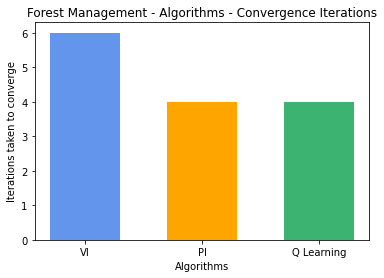

In [200]:
iters = [vi_iter, pi_iter, 4]
algos = ['VI', 'PI', 'Q Learning']
ticks = [0,1,2]
plt.bar(ticks, height= iters,width=0.6, color=['cornflowerblue', 'orange', 'mediumseagreen']) 
plt.xticks(ticks, algos)
plt.xlabel('Algorithms')
plt.ylabel('Iterations taken to converge')
plt.title('Forest Management - Algorithms - Convergence Iterations')

Text(0.5, 1.0, 'Forest Management - Algorithms - Convergence Time')

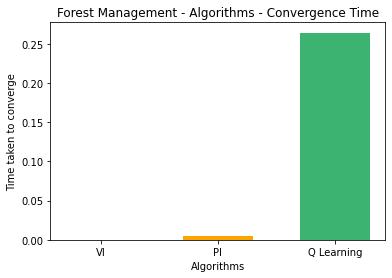

In [201]:
time = [vi_time, pi_time, ql_time]
plt.bar(ticks, height= time,width=0.6, color=['cornflowerblue', 'orange', 'mediumseagreen']) 
plt.xticks(ticks, algos)
plt.xlabel('Algorithms')
plt.ylabel('Time taken to converge')
plt.title('Forest Management - Algorithms - Convergence Time')

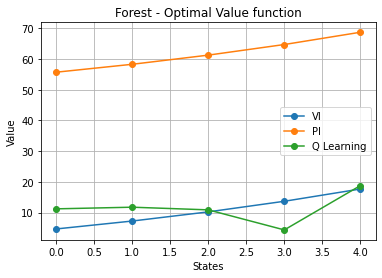

In [202]:
"""
vi_val = [4.657780862484479, 7.237671038484479, 10.22365503848448, 13.67965503848448, 17.67965503848448]
pi_val = [55.72562780159999, 58.30551797759999, 61.29150197759999, 64.7475019776, 68.7475019776]
ql_val = [11.20289474742754, 11.736413468142702, 11.055029279665424, 2.2482872801255396, 6.906188780651046]
"""
states = [0,1,2,3,4]
plt.plot(states, vi_val, label='VI', marker='o')
plt.plot(states, pi_val, label='PI', marker='o')
plt.plot(states, ql_val, label='Q Learning', marker='o')
plt.title('Forest - Optimal Value function')
plt.legend()
plt.xlabel('States')
plt.ylabel('Value')
plt.grid()